## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

## Loading data

In [2]:
data = pd.read_csv('/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_2nd_iter_feat_extract.csv') # this file is in files after the first iteration
data.head()

,Unnamed: 0,sqft_living,sqft_above,bathrooms,view,grade,yr_built,yr_renovated,price
0,0,1180,1180,1.00,without a view,7,1955,not renovated,221900
1,1,2570,2170,2.25,without a view,7,1951,renovated,538000
2,2,770,770,1.00,without a view,6,1933,not renovated,180000
3,3,1960,1050,3.00,without a view,7,1965,not renovated,604000
4,4,1680,1680,2.00,without a view,8,1987,not renovated,510000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    21597 non-null  int64  
 1   sqft_living   21597 non-null  int64  
 2   sqft_above    21597 non-null  int64  
 3   bathrooms     21597 non-null  float64
 4   view          21597 non-null  object 
 5   grade         21597 non-null  int64  
 6   yr_built      21597 non-null  int64  
 7   yr_renovated  21597 non-null  object 
 8   price         21597 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.5+ MB


In [5]:
data = data.drop(['Unnamed: 0', 'yr_built'], axis=1)

In [8]:
data.shape

(21597, 7)

## Splitting the dataset between the categorical and numerical columns

In [10]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)


print("Dataframe of numerical columns: ")
print()

display(numericals)

print("Dataframe of categorical columns: ")
print()

display(categoricals)

Dataframe of numerical columns: 



,sqft_living,sqft_above,bathrooms,grade,price
0,1180,1180,1.00,7,221900
1,2570,2170,2.25,7,538000
2,770,770,1.00,6,180000
3,1960,1050,3.00,7,604000
4,1680,1680,2.00,8,510000
...,...,...,...,...,...
21592,1530,1530,2.50,8,360000
21593,2310,2310,2.50,8,400000
21594,1020,1020,0.75,7,402101
21595,1600,1600,2.50,8,400000


Dataframe of categorical columns: 



,view,yr_renovated
0,without a view,not renovated
1,without a view,renovated
2,without a view,not renovated
3,without a view,not renovated
4,without a view,not renovated
...,...,...
21592,without a view,not renovated
21593,without a view,not renovated
21594,without a view,not renovated
21595,without a view,not renovated


## Normalising the numerical data

In [11]:
#Lets apply scaling to the numerical columns except the final column
#which will be our y variable, average gift

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals.iloc[:,:-1])
scaled_numericals = transformer.transform(numericals.iloc[:,:-1])

Getting a dataframe with the result from the standard scaler which is a numpy array.

As the numpy arrays doesn't have column names, we pick up the column names from the numerical (original) dataframe.

In [12]:
pdscaled_numericals= pd.DataFrame(scaled_numericals,columns=numericals.columns.tolist()[:-1])

In [13]:
pdscaled_numericals.head()

,sqft_living,sqft_above,bathrooms,grade
0,-0.980652,-0.735251,-1.451073,-0.560800
1,0.533369,0.460776,0.174486,-0.560800
2,-1.427234,-1.230575,-1.451073,-1.413190
3,-0.131057,-0.892305,1.149821,-0.560800
4,-0.436040,-0.131197,-0.150626,0.291589


## Dummifying categorical columns

In [14]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()


,view_without a view,yr_renovated_renovated
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


## Putting everything together

In [16]:
full = pd.concat([pdscaled_numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", full.shape)
print()
full

The dataset size is:  (21597, 6)



,sqft_living,sqft_above,bathrooms,view_without a view,yr_renovated_renovated,price
0,-0.980652,-0.735251,-1.451073,1,0,221900
1,0.533369,0.460776,0.174486,1,1,538000
2,-1.427234,-1.230575,-1.451073,1,0,180000
3,-0.131057,-0.892305,1.149821,1,0,604000
4,-0.436040,-0.131197,-0.150626,1,0,510000
...,...,...,...,...,...,...
21592,-0.599424,-0.312413,0.499597,1,0,360000
21593,0.250171,0.629911,0.499597,1,0,400000
21594,-1.154928,-0.928548,-1.776184,1,0,402101
21595,-0.523178,-0.227845,0.499597,1,0,400000


In [17]:
full.columns.tolist()

['sqft_living',
 'sqft_above',
 'bathrooms',
 'view_without a view',
 'yr_renovated_renovated',
 'price']

In [18]:
full_x = pd.DataFrame(full,columns=full.columns.tolist()[:-1])
full_x.head()

,sqft_living,sqft_above,bathrooms,view_without a view,yr_renovated_renovated
0,-0.980652,-0.735251,-1.451073,1,0
1,0.533369,0.460776,0.174486,1,1
2,-1.427234,-1.230575,-1.451073,1,0
3,-0.131057,-0.892305,1.149821,1,0
4,-0.436040,-0.131197,-0.150626,1,0


In [19]:
full_x.columns

Index(['sqft_living', 'sqft_above', 'bathrooms', 'view_without a view',
       'yr_renovated_renovated'],
      dtype='object')

In [20]:
full_x

,sqft_living,sqft_above,bathrooms,view_without a view,yr_renovated_renovated
0,-0.980652,-0.735251,-1.451073,1,0
1,0.533369,0.460776,0.174486,1,1
2,-1.427234,-1.230575,-1.451073,1,0
3,-0.131057,-0.892305,1.149821,1,0
4,-0.436040,-0.131197,-0.150626,1,0
...,...,...,...,...,...
21592,-0.599424,-0.312413,0.499597,1,0
21593,0.250171,0.629911,0.499597,1,0
21594,-1.154928,-0.928548,-1.776184,1,0
21595,-0.523178,-0.227845,0.499597,1,0


In [21]:
#define X and y. 
#X is all the features, scaled numericals and encoded categoricals which are our independent variables
#y is the variable we seek to predict 

X = full_x
y = numericals['price']

## This time I will correct the skewed distribution of some variables

In [22]:
import matplotlib.colors as mcolors

def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col])
        
    plt.show()

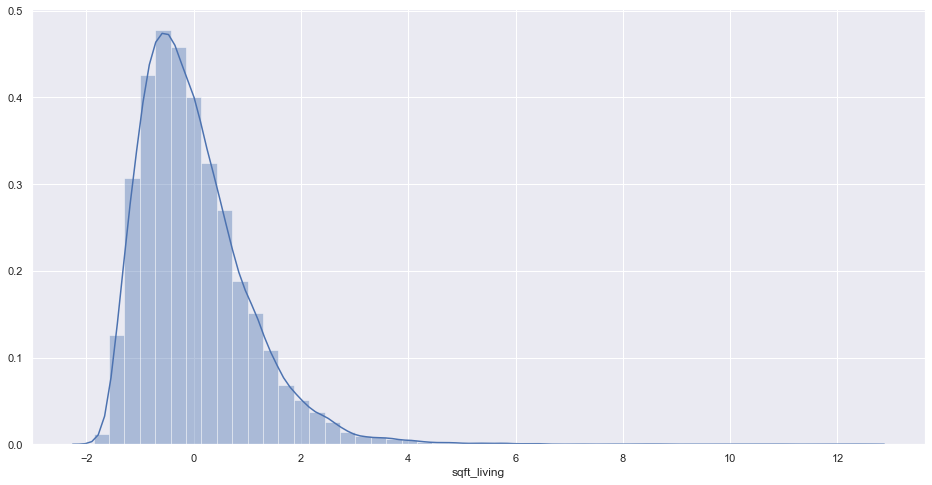

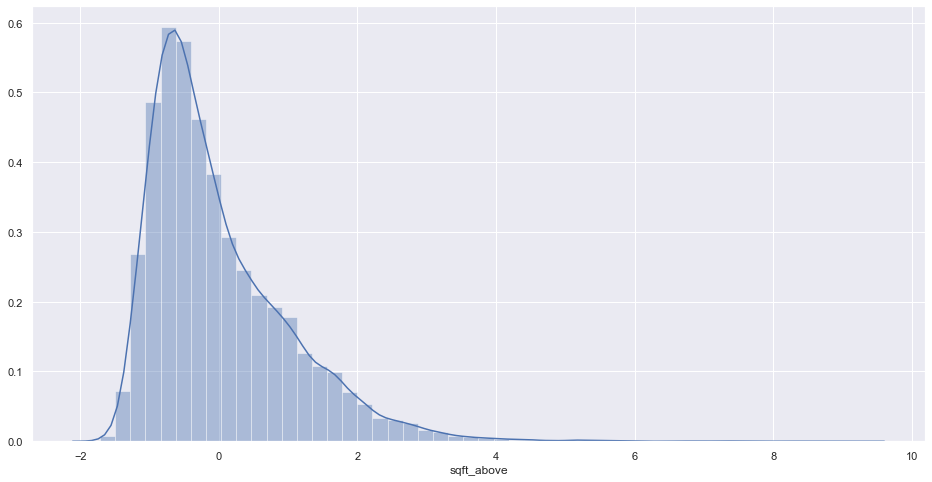

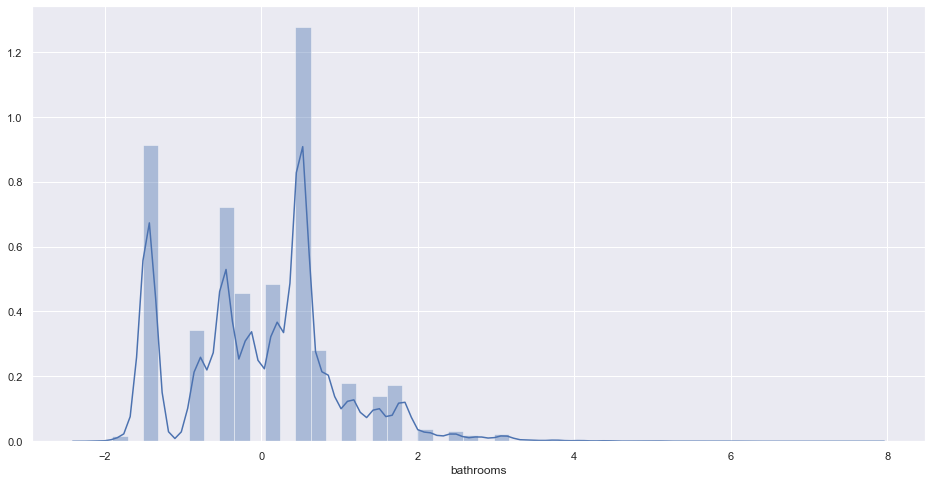

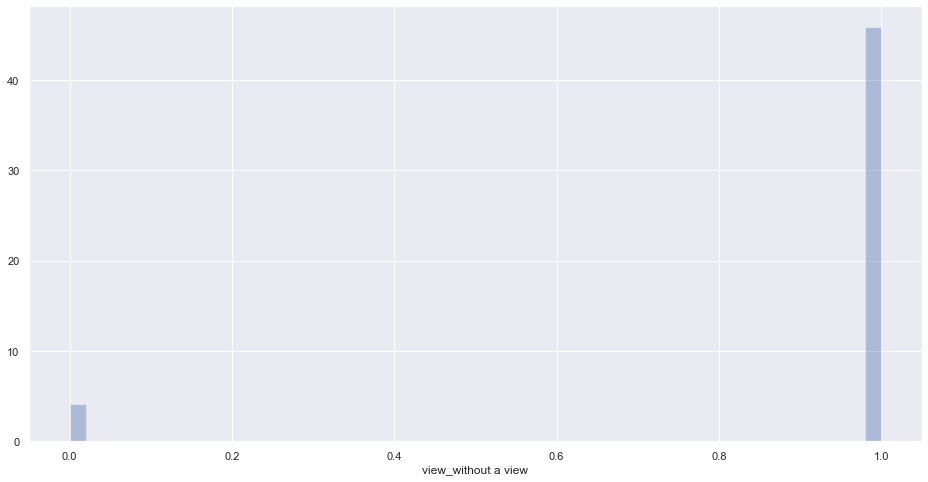

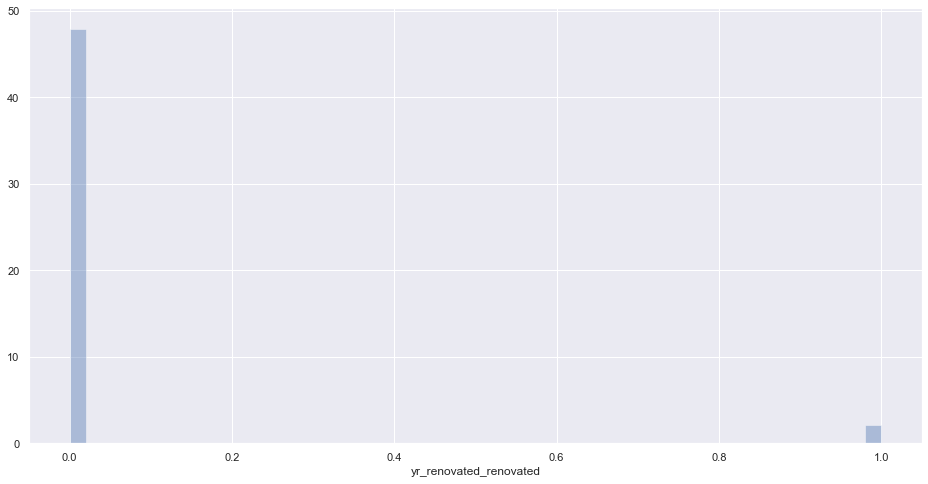

In [23]:
df_hist(X);

After visualising them, we can see numerically the how skewed some distribution are

In [24]:
X.skew()

sqft_living               1.473215
sqft_above                1.447434
bathrooms                 0.519709
view_without a view      -3.026055
yr_renovated_renovated    4.547105
dtype: float64

In [25]:
X_sqrt = np.sqrt(X)  #applying a squared root transformation

In [26]:
X_sqrt.skew()

sqft_living               0.632639
sqft_above                0.360399
bathrooms                 1.152861
view_without a view      -3.026055
yr_renovated_renovated    4.547105
dtype: float64

In [27]:
#df_hist(X_sqrt);

In [28]:
X #=X_sqrt
X.shape

(21597, 5)

In [29]:
y.skew()

4.023364652271239

In [30]:
Y_log = np.log(y)  #Applying a logaritmic transformation on Y
Y_log.skew()

0.4310041773299232

In [31]:
# Normalazing Y 
sc_y = StandardScaler()
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)
#y = y.flatten()
y

array([[-0.86671627],
       [-0.00625157],
       [-0.98077344],
       ...,
       [-0.37618606],
       [-0.38190525],
       [-0.58606486]])

In [32]:
y.shape

(21597, 1)

## Splitting data intro train and test sets.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Getting prediction with Linear Regression

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
#apply the machine learn model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)
#use r2 score to see if this is closer to the data (ie better at predicating 
#target_d, than without the help of the learning process)

0.531039505249131

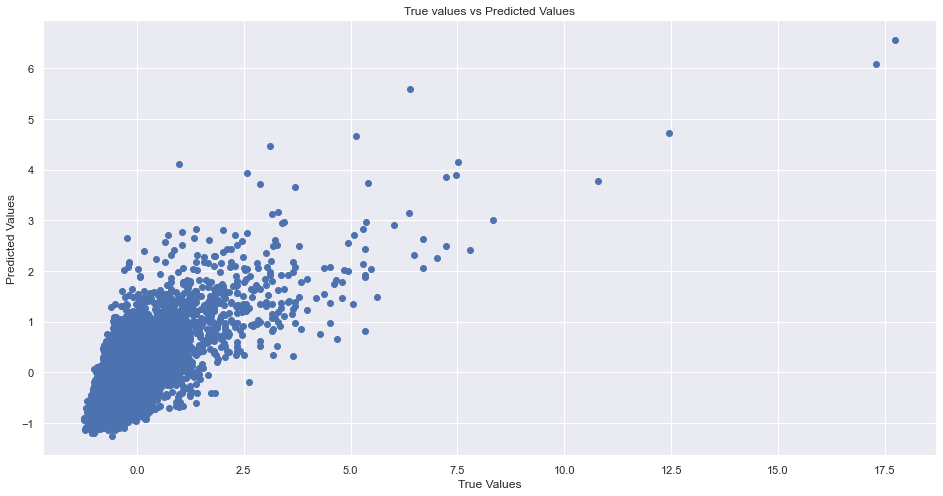

In [36]:
plt.scatter(x=y_test, y=predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

## Training the K-NN model

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

## Getting our predictions

In [38]:
knn_predictions = knn_model.predict(X_test)
# to get some predictions for y we use the x test set. 
# we will later compare the predictions from x test to real test y 

## Getting the error metrics of our K-NN model

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.46
The mean squared error of the model in the test set is:   0.49
The root mean squared error of the model in the test set is:   0.70
The R2 of the model in the test set is: 0.52


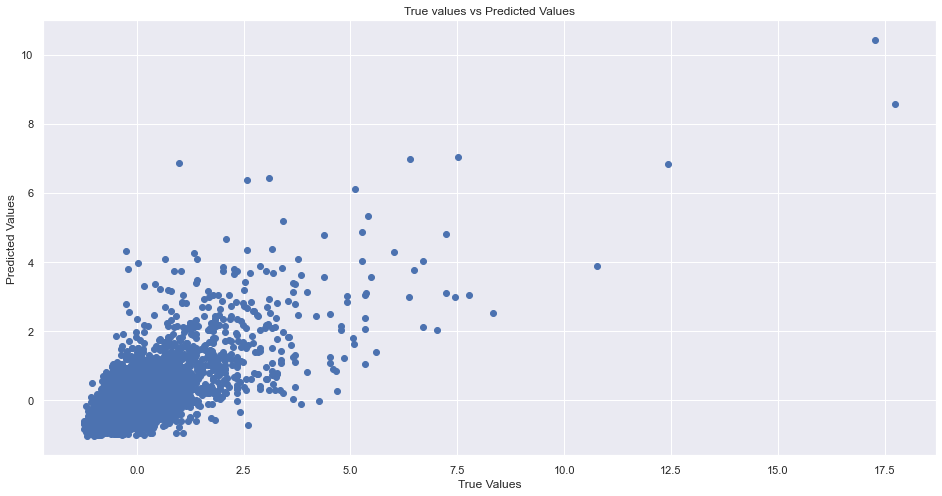

In [40]:
plt.scatter(x=y_test, y=knn_predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

K 
Let's try to find the best K value from a pre-defined set of values.

In [41]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,10): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Now let's plot how it changes the score as a function of K.

Text(0, 0.5, 'R2')

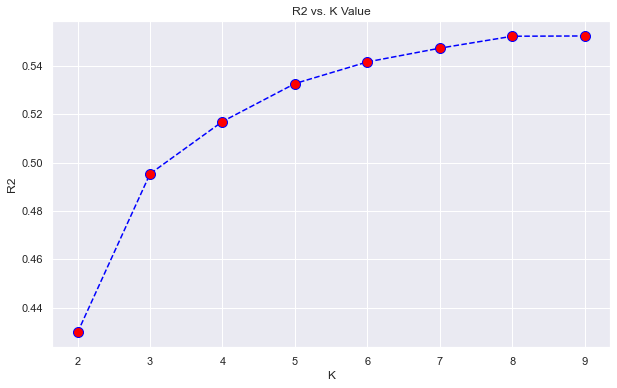

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

#threshold = 0.01 # minimum difference we want between two R2 consecutive values.
#delta = 10. # difference between two consecutive R2 values.
#k = 3 # initival value
#old_score = 0.

#while (delta >= threshold):
#  knn_model = KNeighborsRegressor(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
#  knn_model.fit(X_train, y_train)
#  knn_predictions = knn_model.predict(X_test) 
#  new_score = r2_score(y_test,knn_predictions)
#  delta = new_score - old_score
#  k = k + 4 
#  old_score = new_score

Applying a higher K suggested by the test

In [43]:
uniform_model = KNeighborsRegressor(n_neighbors=9)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

0.5523383873842265

## Best predicted score for this iteration is 0.55